In [1]:
import os
os.chdir(r"C:\Users\user\Desktop\SSAC\price_project\data")

## train.csv 탐색 및 전처리

In [2]:
import pandas as pd
df = pd.read_csv("train/transaction_2018~2020.csv", engine = "python", encoding = "utf8")

In [3]:
df.head(3)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr
0,0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,1987.0,언주로 3
1,1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,8.0,117000.0,2.0,1987.0,언주로 3
2,2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,11.0,130000.0,1.0,1987.0,언주로 3


#### `Unnamed: 0` 제거하기

In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240960 entries, 0 to 240959
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    240915 non-null  object 
 1   apt                     240915 non-null  object 
 2   exclusive_use_area      240915 non-null  float64
 3   transaction_year_month  240915 non-null  float64
 4   transaction_date        240915 non-null  float64
 5   transaction_real_price  240915 non-null  float64
 6   floor                   240915 non-null  float64
 7   year_of_completion      240915 non-null  float64
 8   addr                    240915 non-null  object 
dtypes: float64(6), object(3)
memory usage: 16.5+ MB


#### 결측치 처리

In [6]:
df[df.isnull().any(axis=1)].index.shape

(45,)

In [7]:
df.drop(df[df.isnull().any(axis=1)].index, axis=0 , inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240915 entries, 0 to 240914
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    240915 non-null  object 
 1   apt                     240915 non-null  object 
 2   exclusive_use_area      240915 non-null  float64
 3   transaction_year_month  240915 non-null  float64
 4   transaction_date        240915 non-null  float64
 5   transaction_real_price  240915 non-null  float64
 6   floor                   240915 non-null  float64
 7   year_of_completion      240915 non-null  float64
 8   addr                    240915 non-null  object 
dtypes: float64(6), object(3)
memory usage: 16.5+ MB


#### 아파트 top10브랜드인지(1) 아닌지(0):  `top10_apt` 변수 생성

In [10]:
import re
from tqdm.notebook import tqdm 

In [11]:
df['apt_nm'] = 'apt_name'
for i in tqdm(range(len(df))):
   df.at[i, 'apt_nm'] = re.sub('\(.*\)|\s-\s.*', '', df.at[i,'apt'])
df.head()

  0%|          | 0/240915 [00:00<?, ?it/s]

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,8.0,117000.0,2.0,1987.0,언주로 3,개포6차우성아파트1동~8동
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,11.0,130000.0,1.0,1987.0,언주로 3,개포6차우성아파트1동~8동
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803.0,19.0,139500.0,2.0,1987.0,언주로 3,개포6차우성아파트1동~8동
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804.0,5.0,107500.0,5.0,1987.0,언주로 3,개포6차우성아파트1동~8동


In [12]:
top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크|I\'PARK|I-Park|IPARK|I-PARK', '래미안', 'sk|SK|Sk|sK|에스케이', '플래티넘']

In [13]:
df['top10_apt'] = 0
for brand in tqdm(top10):
    df.loc[df['apt_nm'].str.contains(brand),'top10_apt'] = 1
df.head()

  0%|          | 0/10 [00:00<?, ?it/s]

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm,top10_apt
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,8.0,117000.0,2.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,11.0,130000.0,1.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803.0,19.0,139500.0,2.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804.0,5.0,107500.0,5.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0


#### 시-구-동 나누기

In [14]:
city_name = df['city'].str.split(' ',expand=True)
city_name.head()

,0,1,2
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동


In [15]:
city_name.rename(columns = {0 : 'city_nm', 1: '시군구', 2 : 'dong' }, inplace=True)
city_name.head()

,city_nm,시군구,dong
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동


In [16]:
city_name.shape

(240915, 3)

In [17]:
df = pd.concat([df,city_name],axis = 1)
df.head(2)

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm,top10_apt,city_nm,시군구,dong
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801.0,8.0,117000.0,2.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동


In [18]:
del df['city']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240915 entries, 0 to 240914
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     240915 non-null  object 
 1   exclusive_use_area      240915 non-null  float64
 2   transaction_year_month  240915 non-null  float64
 3   transaction_date        240915 non-null  float64
 4   transaction_real_price  240915 non-null  float64
 5   floor                   240915 non-null  float64
 6   year_of_completion      240915 non-null  float64
 7   addr                    240915 non-null  object 
 8   apt_nm                  240915 non-null  object 
 9   top10_apt               240915 non-null  int64  
 10  city_nm                 240915 non-null  object 
 11  시군구                     240915 non-null  object 
 12  dong                    240915 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 23.9+ MB


In [20]:
df.rename(columns = {'city_nm':'city'}, inplace=True)

In [21]:
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm,top10_apt,city,시군구,dong
0,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동


#### `addr` => `addr_kr`

In [22]:
df.rename(columns = {'addr':'addr_kr'}, inplace=True)
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr_kr,apt_nm,top10_apt,city,시군구,dong
0,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동


In [23]:
import numpy as np

#### 불필요한 변수 제거

In [24]:
#'transaction_id'
df.drop([ 'addr_kr'], axis = 1, inplace = True) # transaction_id는 인덱스와 동일하므로 삭제해도 무방

#### `age`변수 생성
- 2018 -> 2021로 변경

In [25]:
# 건축된지 얼마나 되었는지를 나타내는 변수로 변환
df['age'] = 2021 - df['year_of_completion']
df.drop('year_of_completion', axis = 1, inplace = True)

In [26]:
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,apt_nm,top10_apt,city,시군구,dong,age
0,개포6차우성아파트1동~8동,79.97,201801.0,3.0,130000.0,4.0,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동,34.0


#### 거래 연도-월 분리하기

In [27]:
df['transaction_year_month'] = df['transaction_year_month'].astype(int)

In [28]:
df['transaction_year_month'] = df['transaction_year_month'].astype(str)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240915 entries, 0 to 240914
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     240915 non-null  object 
 1   exclusive_use_area      240915 non-null  float64
 2   transaction_year_month  240915 non-null  object 
 3   transaction_date        240915 non-null  float64
 4   transaction_real_price  240915 non-null  float64
 5   floor                   240915 non-null  float64
 6   apt_nm                  240915 non-null  object 
 7   top10_apt               240915 non-null  int64  
 8   city                    240915 non-null  object 
 9   시군구                     240915 non-null  object 
 10  dong                    240915 non-null  object 
 11  age                     240915 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 22.1+ MB


In [30]:
df['transaction_year_month'].str[:4].astype(int)

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
240910    2020
240911    2020
240912    2020
240913    2020
240914    2020
Name: transaction_year_month, Length: 240915, dtype: int32

In [31]:
df['transaction_year_month'].str[4:].astype(int)

0          1
1          1
2          1
3          3
4          4
          ..
240910     8
240911     7
240912    12
240913     9
240914     9
Name: transaction_year_month, Length: 240915, dtype: int32

In [32]:
df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
del df['transaction_year_month']

In [33]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month
0,개포6차우성아파트1동~8동,79.97,3.0,130000.0,4.0,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동,34.0,2018,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240915 entries, 0 to 240914
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     240915 non-null  object 
 1   exclusive_use_area      240915 non-null  float64
 2   transaction_date        240915 non-null  float64
 3   transaction_real_price  240915 non-null  float64
 4   floor                   240915 non-null  float64
 5   apt_nm                  240915 non-null  object 
 6   top10_apt               240915 non-null  int64  
 7   city                    240915 non-null  object 
 8   시군구                     240915 non-null  object 
 9   dong                    240915 non-null  object 
 10  age                     240915 non-null  float64
 11  transaction_year        240915 non-null  int32  
 12  transaction_month       240915 non-null  int32  
dtypes: float64(5), int32(2), int64(1), object(5)
memory usage: 22.1+ MB


#### `floor` 범주화하기

<AxesSubplot:xlabel='floor'>

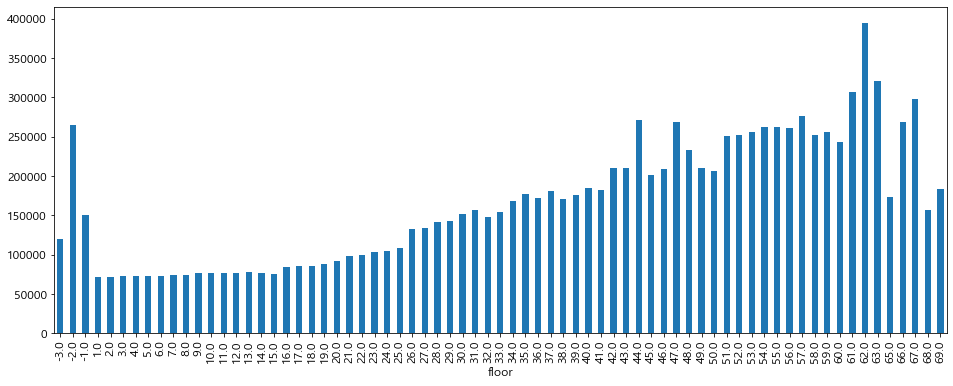

In [35]:
# floor 구간화 필요: 2층과 3층의 가격 차이가 있을까?
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16, 6)

# 대략적인 구간 확인: 1층 이하, 1 ~ 25층, 26층 ~ 49층, 50층 이상
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

##### floor < 1 제거하기

In [36]:
df[df['floor'] < 1].index

Int64Index([ 23286,  43638,  57552,  71718,  72357,  73092,  73107,  73112,
             73154,  73166,  73221,  76617,  76635,  76642,  76970,  82392,
             86202, 102946, 124275, 130619, 130695, 130698, 134337, 148906,
            149365, 149621, 150055, 150064, 150083, 150120, 150235, 150265,
            151443, 152642, 153146, 153673, 153720, 158961, 172432, 181681,
            181694, 183041, 194630, 200300, 201977, 202595, 203138, 203139,
            203763, 207363, 213925, 213937, 216031, 217988, 231291, 231808,
            231810, 232047, 232536, 232546, 232565, 232569, 233988, 236075,
            236080, 236090, 237075, 237434, 237525, 237526],
           dtype='int64')

In [37]:
df[df['floor'] < 1]

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month
23286,천왕연지타운1단지,84.95,25.0,56500.0,-2.0,천왕연지타운1단지,0,서울특별시,구로구,천왕동,8.0,2018,5
43638,성신,75.06,2.0,44000.0,-1.0,성신,0,서울특별시,마포구,대흥동,15.0,2018,8
57552,신장위아파트,84.81,13.0,25700.0,-1.0,신장위아파트,0,서울특별시,성북구,장위동,18.0,2018,3
71718,동자,40.23,10.0,34700.0,-1.0,동자,0,서울특별시,용산구,동자동,52.0,2018,11
72357,강변,64.43,25.0,44200.0,-1.0,강변,0,서울특별시,용산구,이촌동,50.0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236090,은평뉴타운우물골(두산위브7단지),134.51,23.0,104000.0,-3.0,은평뉴타운우물골,0,서울특별시,은평구,진관동,11.0,2020,7
237075,(432-904),56.09,7.0,13500.0,-1.0,,0,서울특별시,중구,신당동,20.0,2020,7
237434,신신(2차),59.98,7.0,18000.0,-1.0,신신,0,서울특별시,중구,신당동,20.0,2020,2
237525,유정,59.65,23.0,17900.0,-1.0,유정,0,서울특별시,중구,신당동,20.0,2020,5


In [38]:
df.drop(df[df['floor'] < 1].index,inplace=True)

<AxesSubplot:xlabel='floor'>

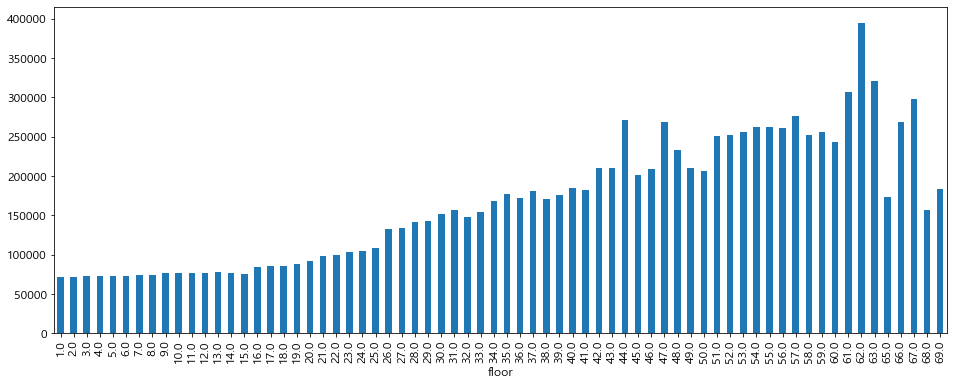

In [39]:
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

In [41]:
# 층 수준을 생성한 뒤, 차이를 봄
def floor_level_converter(x):
    if x <= 25:
        return "low"
    elif x <= 41:
        return "middle"
    elif x <= 50:
        return "high"    
    else:
        return "very_high"
    
df['floor_level'] = df['floor'].apply(floor_level_converter)

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

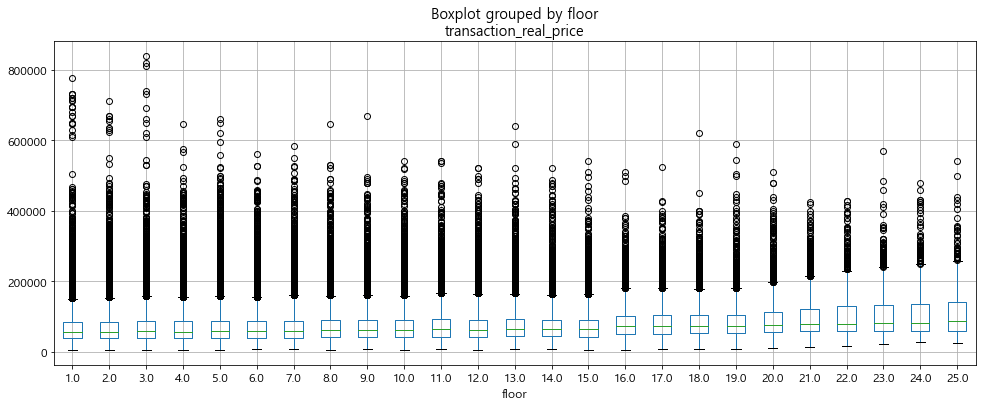

In [163]:
# 저층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'low'].boxplot(column = 'transaction_real_price', by = 'floor')

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

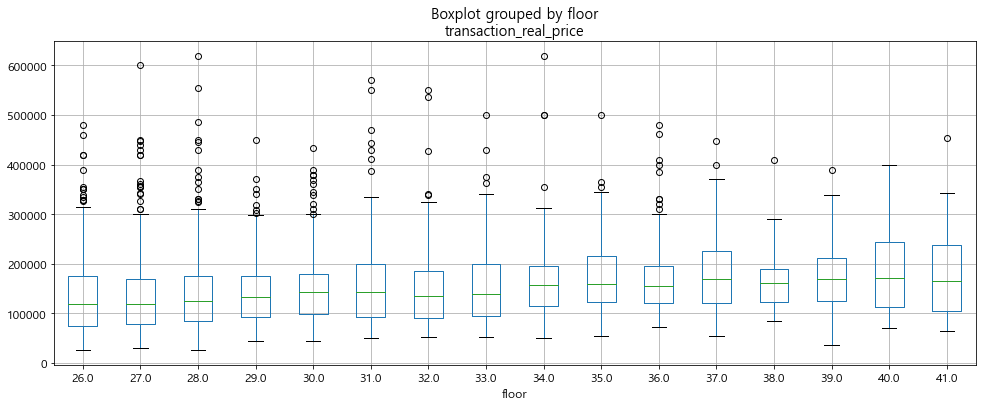

In [164]:
# 중층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'middle'].boxplot(column = 'transaction_real_price', by = 'floor')

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

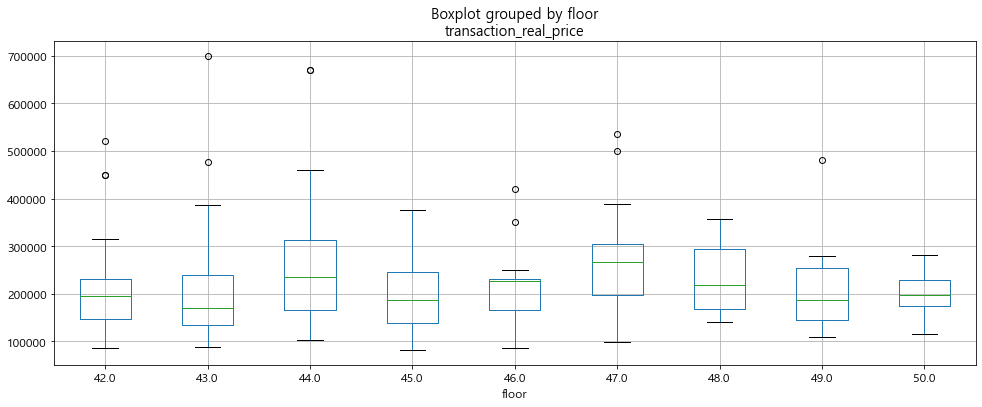

In [165]:
# 고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'high'].boxplot(column = 'transaction_real_price', by = 'floor')

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

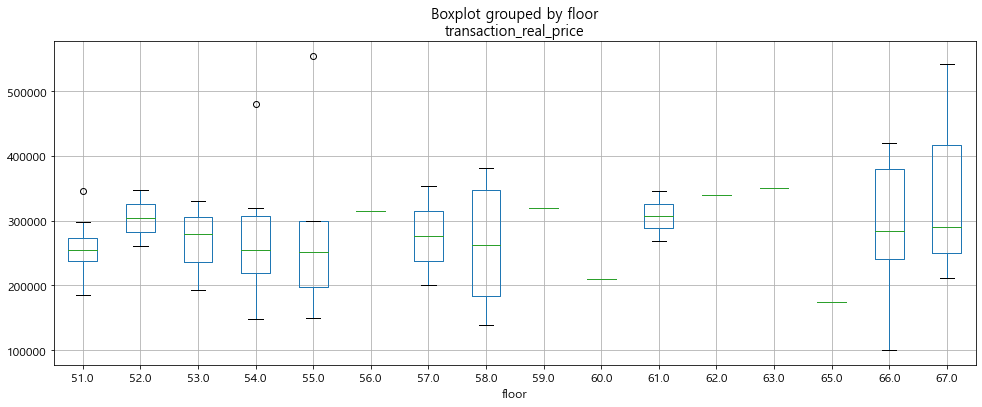

In [41]:
# 초고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층이 높으면 높을수록 가격이 더 오름 (단, 72층을 기준으로 그런 현상이 두드러짐)
df.loc[df['floor_level'] == 'very_high'].boxplot(column = 'transaction_real_price', by = 'floor')

# 결론: floor_level 변수는 유의하나, floor 변수는 초고층에서만 유의
# 따라서 very high를 세분화하거나, floor_level 변수와 floor 변수를 같이 사용하고 교호작용을 고려할 수 있는 트리 계열의 모델 사용이 적합
# 여기서는 very high를 세분화하기로 결정

In [42]:
df.drop('floor', axis = 1, inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240845 entries, 0 to 240914
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     240845 non-null  object 
 1   exclusive_use_area      240845 non-null  float64
 2   transaction_date        240845 non-null  float64
 3   transaction_real_price  240845 non-null  float64
 4   apt_nm                  240845 non-null  object 
 5   top10_apt               240845 non-null  int64  
 6   city                    240845 non-null  object 
 7   시군구                     240845 non-null  object 
 8   dong                    240845 non-null  object 
 9   age                     240845 non-null  float64
 10  transaction_year        240845 non-null  int32  
 11  transaction_month       240845 non-null  int32  
 12  floor_level             240845 non-null  object 
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 23.9+ MB


#### 시세 변수 추가

In [44]:
# 구별 전체 평균 시세 부착
mean_price_per_gu = df.groupby(['city', '시군구'], as_index = False)['transaction_real_price'].mean()
mean_price_per_gu.rename({'transaction_real_price':'구별_전체_평균_시세'}, axis = 1, inplace = True)
df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구']) 

In [45]:
# 구별 작년 시세 부착
# price_per_gu_and_year 변수에 직접 수정을 하므로, df가 변경되는 것을 방지하기 위해, df.copy().groupby~를 사용
price_per_gu_and_year = df.copy().groupby(['city', '시군구', 'transaction_year'], as_index = False)['transaction_real_price'].agg(['mean', 'count'])
price_per_gu_and_year = price_per_gu_and_year.reset_index().rename({"mean":"구별_작년_평균_시세", "count":"구별_작년_거래량"}, axis = 1)

price_per_gu_and_year['transaction_year'] += 1 # 작년것을 붙이기 위해, 1을 더함
df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left') # 작년 기록이 없어서 붙지 않는 것을 방지하기 위해, how = 'left'로 설정
# 작년 거래량 기록이 없기에 0으로.
df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행

In [46]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량
0,개포6차우성아파트1동~8동,79.97,3.0,130000.0,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동,34.0,2018,1,low,172403.047095,NaN,0.0


## 외부 데이터 부착

#### `편의시설통합.csv` 데이터 합치기

In [47]:
amenity = pd.read_csv("train/인구당편의시설.csv", engine = "python", encoding = "utf8")
amenity.head()

,구,stud_per_elementary,stud_per_middle,stud_per_high,인구당대형마트수,인구당백화점수,인구당쇼핑센터수,인구당합계쇼핑수,인구당병원수
0,종로구,399,310,605,0.000000,0.000000,0.000000,0.000000,6.484454
1,중구,416,231,612,1.515324,2.272986,6.061295,9.849604,8.334280
2,용산구,458,390,547,0.839909,0.419955,1.259864,2.519727,1.259864
3,성동구,523,442,510,0.680610,0.000000,0.000000,0.680610,3.743356
4,광진구,648,611,820,0.566567,0.283284,0.000000,0.849851,3.682688


- num -> mean

In [48]:

amenity.drop(columns=["인구당대형마트수", "인구당백화점수", "인구당쇼핑센터수"], axis = 1, inplace=True)

In [49]:
amenity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   구                    25 non-null     object 
 1   stud_per_elementary  25 non-null     int64  
 2   stud_per_middle      25 non-null     int64  
 3   stud_per_high        25 non-null     int64  
 4   인구당합계쇼핑수             25 non-null     float64
 5   인구당병원수               25 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB


In [50]:
pd.options.display.max_columns = 200

In [51]:
df = pd.merge(df, amenity,left_on='시군구',right_on='구',how='left')
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,구,stud_per_elementary,stud_per_middle,stud_per_high,인구당합계쇼핑수,인구당병원수
0,개포6차우성아파트1동~8동,79.97,3.0,130000.0,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동,34.0,2018,1,low,172403.047095,NaN,0.0,강남구,785,650,811,1.85651,12.995572


In [52]:
df.columns

Index(['apt', 'exclusive_use_area', 'transaction_date',
       'transaction_real_price', 'apt_nm', 'top10_apt', 'city', '시군구', 'dong',
       'age', 'transaction_year', 'transaction_month', 'floor_level',
       '구별_전체_평균_시세', '구별_작년_평균_시세', '구별_작년_거래량', '구', 'stud_per_elementary',
       'stud_per_middle', 'stud_per_high', '인구당합계쇼핑수', '인구당병원수'],
      dtype='object')

In [53]:
df.drop('구', axis=1,inplace=True)

In [54]:
park_df = pd.read_csv("park.csv")
park_df.head(1)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14


In [55]:
facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
for col in facility_cols:
    park_df.loc[park_df[col].notnull(), col] = 1
    park_df.loc[park_df[col].isnull(), col] = 0

In [56]:
# 동별 공원 수 
num_park_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)['park_name'].count()
num_park_per_dong.rename({"park_name":"공원수"}, axis = 1, inplace = True)

# 동별 공원에 배치된 facilty 수
num_facilty_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)[facility_cols].sum()
num_facilty_per_dong.head(1)

,city,gu,dong,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other
0,부산광역시,강서구,녹산동,1,0,1,0,1


In [57]:
# 공원 데이터 부착
df = pd.merge(df, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df['공원수'].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

df = pd.merge(df, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df[facility_cols].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [58]:
day_care_center_df = pd.read_csv('day_care_center.csv')
day_care_center_df.head(1)

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31


In [59]:
# 불필요한 변수 제거
day_care_center_df = day_care_center_df[['city', 'gu', 'day_care_type', 'day_care_baby_num']]

In [60]:
# dummy variable : 한번만 학습. OHE불필요. 병합할 것이므로 DROP_FIRST 하지 않음.
dummy_day_care_type = pd.get_dummies(day_care_center_df['day_care_type'], drop_first = False)
dummy_day_care_type = dummy_day_care_type.add_prefix("어린이집유형_")

day_care_center_df = pd.concat([day_care_center_df, dummy_day_care_type], axis = 1)
day_care_center_df.drop('day_care_type', axis = 1, inplace = True)
day_care_center_df.head(1)

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,서울특별시,서대문구,70,0,1,0,0,0,0,0


In [61]:
aggregated_day_care_center_df = day_care_center_df.groupby(['city', 'gu'], as_index = False)[day_care_center_df.columns[2:]].sum()
aggregated_day_care_center_df.head(1)

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,부산광역시,강서구,5312,71.0,6.0,35.0,0.0,5.0,5.0,1.0


In [62]:
# 어린이집 데이터 부착
df = pd.merge(df, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
df[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240845 entries, 0 to 240844
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   apt                          240845 non-null  object 
 1   exclusive_use_area           240845 non-null  float64
 2   transaction_date             240845 non-null  float64
 3   transaction_real_price       240845 non-null  float64
 4   apt_nm                       240845 non-null  object 
 5   top10_apt                    240845 non-null  int64  
 6   city                         240845 non-null  object 
 7   시군구                          240845 non-null  object 
 8   dong                         240845 non-null  object 
 9   age                          240845 non-null  float64
 10  transaction_year             240845 non-null  int32  
 11  transaction_month            240845 non-null  int32  
 12  floor_level                  240845 non-null  object 
 13 

In [64]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,stud_per_elementary,stud_per_middle,stud_per_high,인구당합계쇼핑수,인구당병원수,공원수,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,개포6차우성아파트1동~8동,79.97,3.0,130000.0,개포6차우성아파트1동~8동,0,서울특별시,강남구,개포동,34.0,2018,1,low,172403.047095,NaN,0.0,785,650,811,1.85651,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0


In [65]:
del df['apt_nm']

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240845 entries, 0 to 240844
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   apt                          240845 non-null  object 
 1   exclusive_use_area           240845 non-null  float64
 2   transaction_date             240845 non-null  float64
 3   transaction_real_price       240845 non-null  float64
 4   top10_apt                    240845 non-null  int64  
 5   city                         240845 non-null  object 
 6   시군구                          240845 non-null  object 
 7   dong                         240845 non-null  object 
 8   age                          240845 non-null  float64
 9   transaction_year             240845 non-null  int32  
 10  transaction_month            240845 non-null  int32  
 11  floor_level                  240845 non-null  object 
 12  구별_전체_평균_시세                  240845 non-null  float64
 13 

In [67]:
df.columns

Index(['apt', 'exclusive_use_area', 'transaction_date',
       'transaction_real_price', 'top10_apt', 'city', '시군구', 'dong', 'age',
       'transaction_year', 'transaction_month', 'floor_level', '구별_전체_평균_시세',
       '구별_작년_평균_시세', '구별_작년_거래량', 'stud_per_elementary', 'stud_per_middle',
       'stud_per_high', '인구당합계쇼핑수', '인구당병원수', '공원수', 'park_exercise_facility',
       'park_entertainment_facility', 'park_benefit_facility',
       'park_cultural_facitiy', 'park_facility_other', 'day_care_baby_num',
       '어린이집유형_가정', '어린이집유형_국공립', '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인',
       '어린이집유형_직장', '어린이집유형_협동'],
      dtype='object')

- 산책로 데이터 부착

In [68]:
course=pd.read_csv(r'C:\Users\user\Desktop\SSAC\price_project\data\walk_course.csv')

In [69]:
course.head()

,Unnamed: 0,gu,course_count,course_mean
0,0,강남구,185,1.108108
1,1,강동구,98,1.653061
2,2,강북구,41,2.048780
3,3,강서구,167,0.568862
4,4,관악구,68,2.235294


In [70]:
course=course.drop('Unnamed: 0', axis=1)
course.head()

,gu,course_count,course_mean
0,강남구,185,1.108108
1,강동구,98,1.653061
2,강북구,41,2.048780
3,강서구,167,0.568862
4,관악구,68,2.235294


In [71]:
df.head()

,apt,exclusive_use_area,transaction_date,transaction_real_price,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,stud_per_elementary,stud_per_middle,stud_per_high,인구당합계쇼핑수,인구당병원수,공원수,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,개포6차우성아파트1동~8동,79.97,3.0,130000.0,0,서울특별시,강남구,개포동,34.0,2018,1,low,172403.047095,NaN,0.0,785,650,811,1.85651,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0
1,개포6차우성아파트1동~8동,79.97,8.0,117000.0,0,서울특별시,강남구,개포동,34.0,2018,1,low,172403.047095,NaN,0.0,785,650,811,1.85651,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0
2,개포6차우성아파트1동~8동,79.97,11.0,130000.0,0,서울특별시,강남구,개포동,34.0,2018,1,low,172403.047095,NaN,0.0,785,650,811,1.85651,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0
3,개포6차우성아파트1동~8동,79.97,19.0,139500.0,0,서울특별시,강남구,개포동,34.0,2018,3,low,172403.047095,NaN,0.0,785,650,811,1.85651,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0
4,개포6차우성아파트1동~8동,54.98,5.0,107500.0,0,서울특별시,강남구,개포동,34.0,2018,4,low,172403.047095,NaN,0.0,785,650,811,1.85651,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0


In [72]:
df=pd.merge(df, course, left_on='시군구',right_on='gu', how='left')
df=df.drop('course_count', axis=1)

In [73]:
len(df)

240845

In [74]:
df.isnull().sum()

apt                                0
exclusive_use_area                 0
transaction_date                   0
transaction_real_price             0
top10_apt                          0
city                               0
시군구                                0
dong                               0
age                                0
transaction_year                   0
transaction_month                  0
floor_level                        0
구별_전체_평균_시세                        0
구별_작년_평균_시세                    81588
구별_작년_거래량                          0
stud_per_elementary                0
stud_per_middle                    0
stud_per_high                      0
인구당합계쇼핑수                           0
인구당병원수                             0
공원수                                0
park_exercise_facility         73033
park_entertainment_facility    73033
park_benefit_facility          73033
park_cultural_facitiy          73033
park_facility_other            73033
day_care_baby_num              35583
어

### 모델 학습

In [75]:
X = df.drop(['gu','city', 'dong', 'apt', 'transaction_date', 'transaction_real_price', '시군구', 'transaction_year', 'transaction_month'], axis = 1)
Y = df['transaction_real_price']

In [76]:
X

,exclusive_use_area,top10_apt,age,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,stud_per_elementary,stud_per_middle,stud_per_high,인구당합계쇼핑수,인구당병원수,공원수,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동,course_mean
0,79.97,0,34.0,low,172403.047095,NaN,0.0,785,650,811,1.856510,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0,1.108108
1,79.97,0,34.0,low,172403.047095,NaN,0.0,785,650,811,1.856510,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0,1.108108
2,79.97,0,34.0,low,172403.047095,NaN,0.0,785,650,811,1.856510,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0,1.108108
3,79.97,0,34.0,low,172403.047095,NaN,0.0,785,650,811,1.856510,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0,1.108108
4,54.98,0,34.0,low,172403.047095,NaN,0.0,785,650,811,1.856510,12.995572,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0,1.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240840,67.57,0,18.0,low,44998.326330,44479.230442,2352.0,633,475,615,1.527596,5.091987,0.0,NaN,NaN,NaN,NaN,NaN,11533.0,97.0,44.0,95.0,4.0,0.0,2.0,0.0,1.852632
240841,95.94,0,14.0,low,44998.326330,44479.230442,2352.0,633,475,615,1.527596,5.091987,0.0,NaN,NaN,NaN,NaN,NaN,11533.0,97.0,44.0,95.0,4.0,0.0,2.0,0.0,1.852632
240842,100.17,0,14.0,low,44998.326330,44479.230442,2352.0,633,475,615,1.527596,5.091987,0.0,NaN,NaN,NaN,NaN,NaN,11533.0,97.0,44.0,95.0,4.0,0.0,2.0,0.0,1.852632
240843,77.71,0,14.0,low,44998.326330,44479.230442,2352.0,633,475,615,1.527596,5.091987,0.0,NaN,NaN,NaN,NaN,NaN,11533.0,97.0,44.0,95.0,4.0,0.0,2.0,0.0,1.852632


In [77]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape # 샘플 대비 특징이 매우 적음 => 큰 부담없이 더미화 가능
# 컬럼 타입이 섞여 있으므로, 트리 계열의 모델이 적절한 것으로 판단됨
# 또한, 샘플이 충분히 많으므로 트리 뿐만 아니라 트리 기반의 앙상블도 적절할 것으로 보임
# Tip. Decision Tree 계열의 모델은 상대적으로 전처리나 탐색의 부담이 제일 적은 모델임

(180633, 27)

In [59]:
# !pip install feature_engine

     |████████████████████████████████| 180 kB 14.8 MB/s 
     |████████████████████████████████| 9.8 MB 68.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [78]:
# 더미화
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder as OHE
from feature_engine.encoding import OneHotEncoder as OHE
dummy_model = OHE(variables = ['floor_level'],
                 drop_last = False)

dummy_model.fit(Train_X)

Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)

In [79]:
# 변수 부착 과정에서 생성된 결측 대체
from sklearn.impute import SimpleImputer as SI
imputer = SI().fit(Train_X) # DEFAULT: MEAN으로 대체
# imputer.transform(Train_X): nd.array
Train_X = pd.DataFrame(imputer.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(imputer.transform(Test_X), columns = Test_X.columns)

In [ ]:
#!pip install xgboost

In [ ]:
#!pip install lightgbm

In [1]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [81]:
model_parameter_dict = dict()
RFR_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                   "n_estimators": [100, 200]})

XL_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                  "n_estimators": [100, 200],
                                  "learning_rate": [0.05, 0.1, 0.2]})

model_parameter_dict[RFR] = RFR_parameter_grid
model_parameter_dict[XGB] = XL_parameter_grid
model_parameter_dict[LGB] = XL_parameter_grid

In [83]:
# 출력을 위한 max_iter_num 계산
max_iter_num = len(range(30, 4, -5)) * len(model_parameter_dict) * len(XL_parameter_grid) ** 2
           
from sklearn.metrics import mean_absolute_error as MAE
best_score = 9999999999 # 작을수록 좋은 값
iteration_num = 0
# 상호관련성 기반: mutual_info_regression , k: 특징의 개수
for k in tqdm(range(30, 4, -5)): 
    selector = SelectKBest(mutual_info_regression, k = k).fit(Train_X, Train_Y)
    s_Train_X = selector.transform(Train_X)
    s_Test_X = selector.transform(Test_X)
    # lgm: nd.array로 입력하는 것이 오류 줄임.
    
    for model_func in tqdm(model_parameter_dict.keys()):
        for parameter in model_parameter_dict[model_func]:
            model = model_func(**parameter).fit(s_Train_X, Train_Y) # Light GBM은 DataFrame의 컬럼 이름에 대한 제약이 있어, ndarray를 입력으로 사용
            pred_Y = model.predict(s_Test_X)
            score = MAE(Test_Y, pred_Y)
            
            if score < best_score:
                print(k, model_func, parameter, score)
                best_score = score
                best_model_func = model_func
                best_parameter = parameter
                best_selector = selector

            iteration_num += 1
            print("iter_num:{}/{}, score: {}, best_score: {}".format(iteration_num, max_iter_num, round(score, 2), round(best_score, 2)))

  0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [137]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [88]:
final_X = pd.concat([Train_X, Test_X], axis = 0, ignore_index = True)
final_Y = pd.concat([Train_Y, Test_Y], axis = 0, ignore_index = True)

final_model = best_model_func(**best_parameter).fit(best_selector.transform(final_X), final_Y)

### 파이프라인 구축

In [66]:
# df: 새로운 데이터 셋
# 일련의 전처리 과정
# 

In [117]:
def pipeline(df, model, selector, mean_price_per_gu, amenity,course, imputer, dummy_model):
    
    # 첫 열 삭제
    del df['Unnamed: 0']
    
    # 결측치 처리
    df.drop(df[df.isnull().any(axis=1)].index, axis=0 , inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    #아파트top10 브랜드 추가하기
    df['apt_nm'] = 'apt_name'
    for i in tqdm(range(len(df))):
       df.at[i, 'apt_nm'] = re.sub('\(.*\)|\s-\s.*', '', df.at[i,'apt'])
    
    top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크|I\'PARK|I-Park|IPARK|I-PARK', '래미안', 'sk|SK|Sk|sK|에스케이', '플래티넘']
    
    df['top10_apt'] = 0
    for brand in tqdm(top10):
        df.loc[df['apt_nm'].str.contains(brand),'top10_apt'] = 1
    
    
    # 시-구-동 나누기
    city_name = df['city'].str.split(' ',expand=True)
    city_name.rename(columns = {0 : 'city_nm', 1: '시군구', 2 : 'dong' }, inplace=True)
    df = pd.concat([df,city_name],axis = 1)
    del df['city']
    df.rename(columns = {'city_nm':'city'}, inplace=True)
    
    # 'addr_kr'로 col명 변경
    df.rename(columns = {'addr':'addr_kr'}, inplace=True)
    df.drop([ 'addr_kr'], axis = 1, inplace = True)
    
    # age 변수 부착
    df['age'] = 2021 - df['year_of_completion']
    df.drop('year_of_completion', axis = 1, inplace = True)    
    
    # 거래 년월 부착
    df['transaction_year_month'] = df['transaction_year_month'].astype(int) 
    df['transaction_year_month'] = df['transaction_year_month'].astype(str)
    df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
    df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
    del df['transaction_year_month']
    
    # floor_level 변수 생성
    
    df['floor_level'] = df['floor'].apply(floor_level_converter)
    df.drop('floor', axis = 1, inplace = True)    
    
    # 시세 관련 변수 추가
    df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구'])
    df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left')
    df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행
    
    # 편의시설통합 정보 합치기
    df = pd.merge(df, amenity,left_on='시군구',right_on='구',how='left')
    df.drop('구', axis=1,inplace=True)
    
    # 공원 데이터 부착
    df = pd.merge(df, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    df['공원수'].fillna(0, inplace = True)
    df.drop('gu', axis = 1, inplace = True)

    df = pd.merge(df, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    
    facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
    df[facility_cols].fillna(0, inplace = True)
    df.drop('gu', axis = 1, inplace = True)    
    
    # 어린이집 데이터 부착
    df = pd.merge(df, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
    df[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
    df.drop('gu', axis = 1, inplace = True)
    
    # 불필요한 변수 삭제
    df.drop('apt_nm', axis = 1, inplace = True) 
    # 산책로 데이터 부착
    df=pd.merge(df, course, left_on='시군구',right_on='gu', how='left')
    df=df.drop('course_count', axis=1)
    # 특징 추출 ('transaction_real_price'는 drop 대상에서 제외)
    X = df.drop(['gu','city', 'dong', 'apt', 'transaction_date','시군구', 'transaction_real_price','transaction_year', 'transaction_month'], axis = 1)
    
    # 더미화
    X = dummy_model.transform(X)
    
    # 결측 대체
    X = imputer.transform(X)
            
    # 특징 선택
    X = selector.transform(X)
    
    return  model.predict(X)

In [118]:
# 모델 저장
import pickle
pipeline_element = {
                   "model":final_model,
                   "selector":best_selector,
                   "mean_price_per_gu":mean_price_per_gu,
                   "amenity":amenity,
                   "imputer":imputer,
                    "course" : course,
                   "dummy_model":dummy_model,
                   "pipeline":pipeline}

# write binary: write pickle file 
with open("아파트실거래가예측모델.pckl", "wb") as f:
    pickle.dump(pipeline_element, f)

In [119]:
# 모델 불러오기
with open("아파트실거래가예측모델.pckl", "rb") as f:
    pipeline_element = pickle.load(f)


model = pipeline_element["model"]
selector = pipeline_element["selector"]                 
mean_price_per_gu = pipeline_element["mean_price_per_gu"]
amenity = pipeline_element["amenity"]
imputer = pipeline_element["imputer"]
course = pipeline_element['course']
dummy_model = pipeline_element["dummy_model"]
pipeline = pipeline_element["pipeline"]

In [122]:
test_df = pd.read_csv(r"C:\Users\user\Desktop\SSAC\price_project\data\test_seoul_2021.csv",engine = "python", encoding = "utf8")
test_df.head(1)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr
0,0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,202104.0,15.0,174000.0,9.0,1988.0,언주로 103


In [123]:
test_df.shape

(41166, 10)

In [124]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              41166 non-null  int64  
 1   city                    41151 non-null  object 
 2   apt                     41151 non-null  object 
 3   exclusive_use_area      41151 non-null  float64
 4   transaction_year_month  41151 non-null  float64
 5   transaction_date        41151 non-null  float64
 6   transaction_real_price  41151 non-null  float64
 7   floor                   41151 non-null  float64
 8   year_of_completion      41151 non-null  float64
 9   addr                    41151 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


- test data를 결측값이 없도록 전처리하며 reindexing해줌

In [125]:
no_null = test_df.drop(test_df[test_df.isnull().any(axis=1)].index, axis=0)

In [126]:
no_null.reset_index(drop=True, inplace=True)

In [127]:
test_real_price = no_null['transaction_real_price']

In [128]:
test_real_price

0        174000.0
1        195000.0
2        200000.0
3        220000.0
4        245000.0
           ...   
41146     88000.0
41147     30500.0
41148     49500.0
41149     30000.0
41150     61500.0
Name: transaction_real_price, Length: 41151, dtype: float64

In [113]:
test_real_price.values

array([174000., 195000., 200000., ...,  49500.,  30000.,  61500.])

In [114]:
test_real_price[41150]

61500.0

In [121]:
len(test_real_price)

41151

In [130]:
output = pipeline(test_df, model, selector, mean_price_per_gu,amenity, course, imputer, dummy_model)
len(output)

  0%|          | 0/41151 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


41151

In [131]:
output

array([173857.02 , 183925.23 , 183925.23 , ...,  48386.902,  47926.996,
        67789.375], dtype=float32)

In [132]:
result_df = pd.DataFrame({'predicted_price': output,'transaction_real_price':test_real_price.values})
result_df.head()

,predicted_price,transaction_real_price
0,173857.015625,174000.0
1,183925.234375,195000.0
2,183925.234375,200000.0
3,183925.234375,220000.0
4,214521.109375,245000.0


In [139]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(result_df['predicted_price'], result_df['transaction_real_price']) 
np.sqrt(MSE)

28632.566678765153

In [140]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False])

In [141]:
# 전체컬럼
Train_X.columns

Index(['exclusive_use_area', 'top10_apt', 'age', '구별_전체_평균_시세', '구별_작년_평균_시세',
       '구별_작년_거래량', 'stud_per_elementary', 'stud_per_middle', 'stud_per_high',
       '인구당합계쇼핑수', '인구당병원수', '공원수', 'park_exercise_facility',
       'park_entertainment_facility', 'park_benefit_facility',
       'park_cultural_facitiy', 'park_facility_other', 'day_care_baby_num',
       '어린이집유형_가정', '어린이집유형_국공립', '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인',
       '어린이집유형_직장', '어린이집유형_협동', 'course_mean', 'floor_level_low',
       'floor_level_middle', 'floor_level_high', 'floor_level_very_high'],
      dtype='object')

In [142]:
# 사용컬럼
Train_X.columns[selector.get_support()]

Index(['exclusive_use_area', 'top10_apt', 'age', '구별_전체_평균_시세', '구별_작년_평균_시세',
       '구별_작년_거래량', 'stud_per_elementary', 'stud_per_middle', 'stud_per_high',
       '인구당합계쇼핑수', '인구당병원수', '공원수', 'park_exercise_facility',
       'park_entertainment_facility', 'park_benefit_facility',
       'park_facility_other', 'day_care_baby_num', '어린이집유형_가정', '어린이집유형_국공립',
       '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인', '어린이집유형_직장', '어린이집유형_협동',
       'course_mean'],
      dtype='object')

In [143]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)